# Part_2: Stroke_Prediction - Preparation of data for the classification process

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('c:/1/Stroke_Prediction_CLEAR.csv')
df.head(5)

,Unnamed: 0,ID,Gender,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke,Age_years,Age_years_10
0,1,30650,Male,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,58.093151,"(53.126, 59.076]"
1,3,57008,Female,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,70.076712,"(65.121, 74.11]"
2,6,53725,Female,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,52.041096,"(48.082, 53.126]"
3,7,41553,Female,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,75.104110,"(74.11, 82.137]"
4,8,16167,Female,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,32.024658,"(29.055, 36.058]"


### <span style="color:blue">1. Podział danych na ciągłe i dyskretne</span>

In [2]:
del df['Unnamed: 0']
df.dtypes

ID                  int64
Gender             object
Hypertension        int64
Heart_Disease       int64
Ever_Married       object
Type_Of_Work       object
Residence          object
Avg_Glucose       float64
BMI               float64
Smoking_Status     object
Stroke              int64
Age_years         float64
Age_years_10       object
dtype: object

In [3]:
categorical_vars = df.describe(include=["object"]).columns
continuous_vars = df.describe().columns

In [4]:
# zmienne dyskretne
categorical_vars

Index(['Gender', 'Ever_Married', 'Type_Of_Work', 'Residence', 'Smoking_Status',
       'Age_years_10'],
      dtype='object')

In [5]:
# zmienne ciągłe
continuous_vars

Index(['ID', 'Hypertension', 'Heart_Disease', 'Avg_Glucose', 'BMI', 'Stroke',
       'Age_years'],
      dtype='object')

### <span style="color:blue">2. Przegląd struktury danych ciągłych i danych dyskretnych</span>

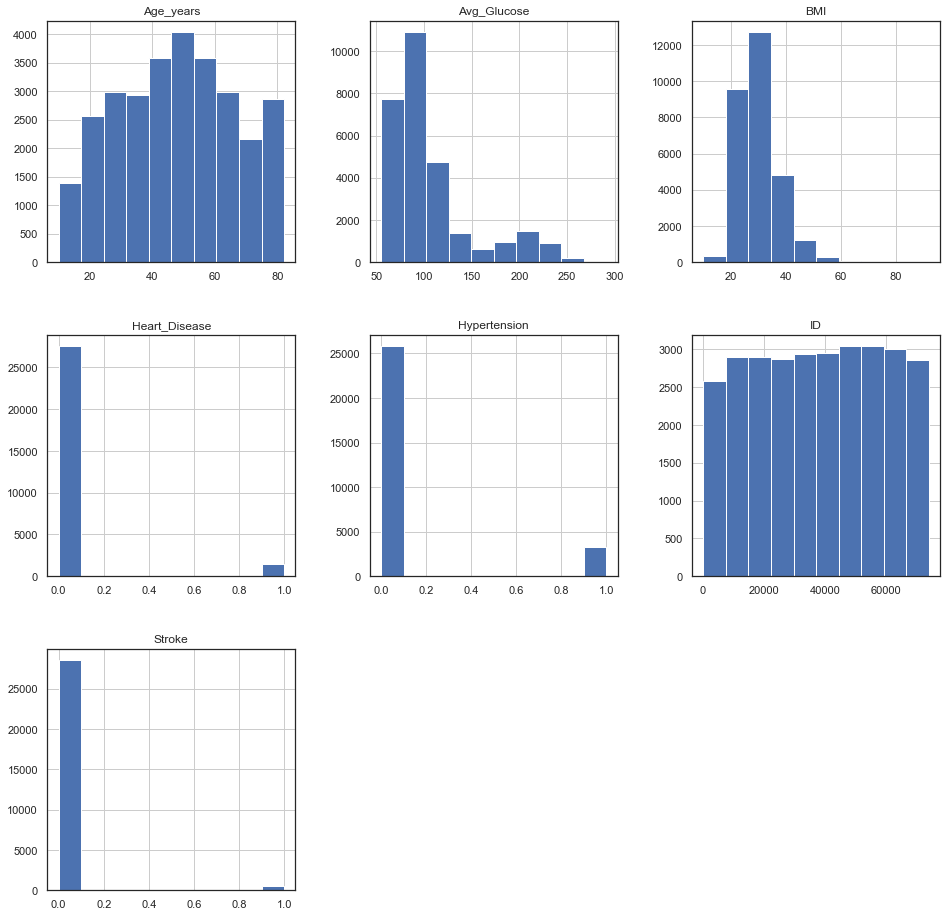

In [6]:
sns.set(style="white")
_ = df.hist(column=continuous_vars, figsize = (16,16))

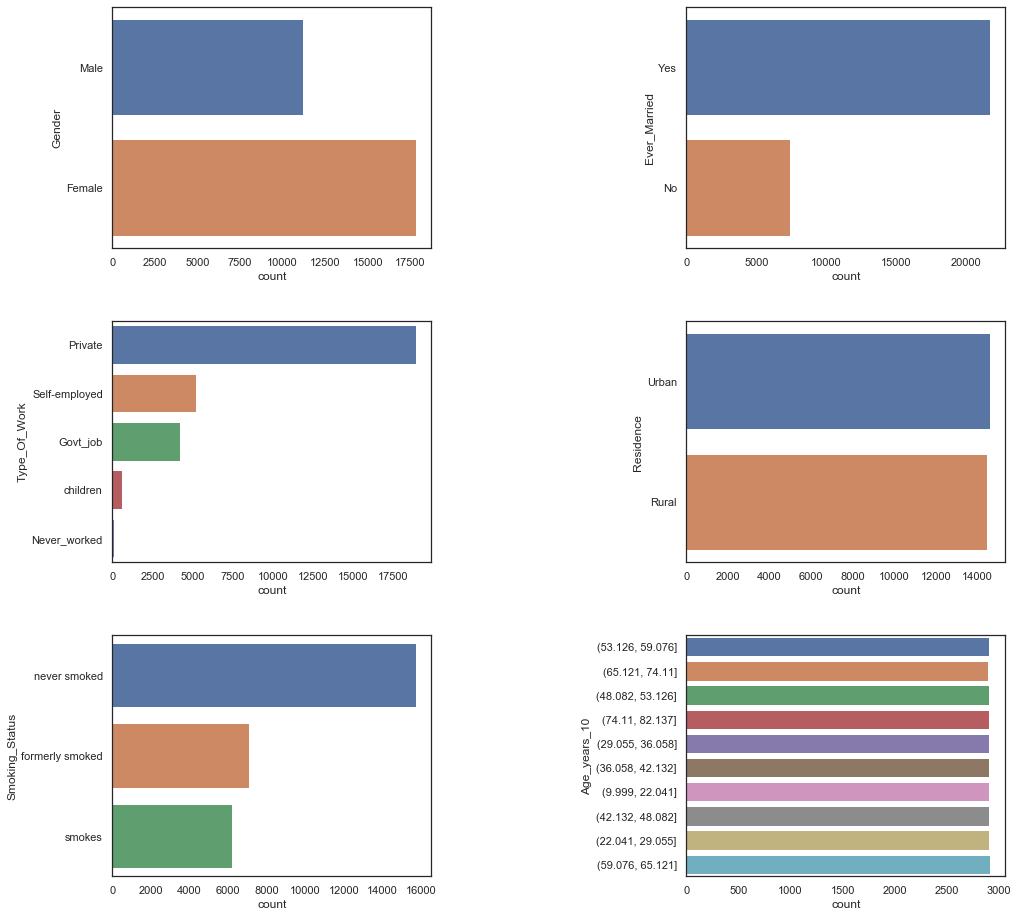

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
# robie przestrzeń między wykresami 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.3)
# pętla: mamy 9 zmiennych dyskretnych
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)

### <span style="color:blue">2. Cyfryzacja wartości dyskretnych</span>

In [8]:
df['Gender_C'] = pd.Categorical(df['Gender']).codes
df[['Gender','Gender_C']].head(5)

,Gender,Gender_C
0,Male,1
1,Female,0
2,Female,0
3,Female,0
4,Female,0


In [9]:
df['Ever_Married_C'] = pd.Categorical(df['Ever_Married']).codes
df[['Ever_Married','Ever_Married_C']].sample(5)

,Ever_Married,Ever_Married_C
23471,No,0
996,Yes,1
5984,Yes,1
25023,Yes,1
16740,Yes,1


In [10]:
df['Type_Of_Work_C'] = pd.Categorical(df['Type_Of_Work']).codes
df[['Type_Of_Work','Type_Of_Work_C']].sample(3)

,Type_Of_Work,Type_Of_Work_C
12694,Private,2
6096,Govt_job,0
2116,Private,2


In [11]:
df['Residence_C'] = pd.Categorical(df['Residence']).codes
df[['Residence','Residence_C']].sample(3)

,Residence,Residence_C
23008,Rural,0
27557,Rural,0
12299,Rural,0


In [12]:
df['Smoking_Status_C'] = pd.Categorical(df['Smoking_Status']).codes
df[['Smoking_Status','Smoking_Status_C']].sample(3)

,Smoking_Status,Smoking_Status_C
10769,never smoked,1
27420,never smoked,1
10370,smokes,2


In [13]:
df['Age_years_10_C'] = pd.Categorical(df['Age_years_10']).codes
df[['Age_years_10','Age_years_10_C']].sample(5)

,Age_years_10,Age_years_10_C
2967,"(59.076, 65.121]",6
20614,"(9.999, 22.041]",9
22264,"(42.132, 48.082]",3
324,"(22.041, 29.055]",0
1353,"(65.121, 74.11]",7


### <span style="color:blue">3. Analiza korelacji zmiennych</span>
W procesie klasyfikacji pojawienie się zjawiska multicollinearity jest bardzo niekorzystne dla sta bilności modelu.
Sprawdzam jaki jest poziom wzajemnej korelacji zmiennyc

In [14]:
categorical_vars = df.describe(include=["object"]).columns
continuous_vars = df.describe().columns

In [15]:
continuous_vars

Index(['ID', 'Hypertension', 'Heart_Disease', 'Avg_Glucose', 'BMI', 'Stroke',
       'Age_years', 'Gender_C', 'Ever_Married_C', 'Type_Of_Work_C',
       'Residence_C', 'Smoking_Status_C', 'Age_years_10_C'],
      dtype='object')

Text(0.5, 1, 'Macierz korelacji ze zmienną wynikową: Stroke')

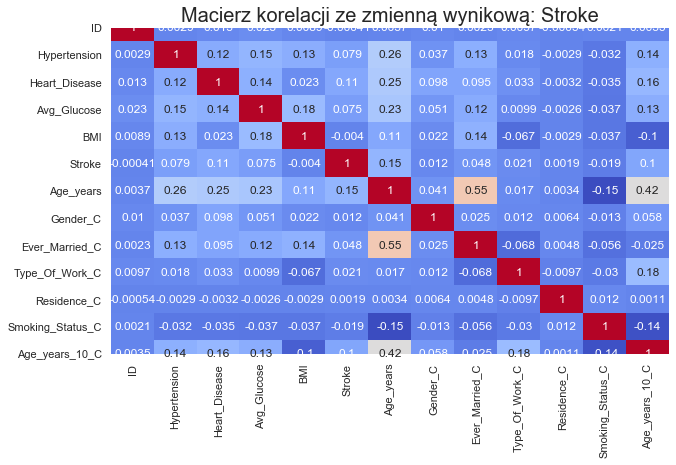

In [16]:
plt.figure(figsize=(10,6))
CORREL =df.corr()
sns.heatmap(CORREL, annot=True, cbar=False, cmap="coolwarm")
plt.title('Macierz korelacji ze zmienną wynikową: Stroke', fontsize=20)

Text(0, 0.5, 'Zmienne nezależne ciągłe')

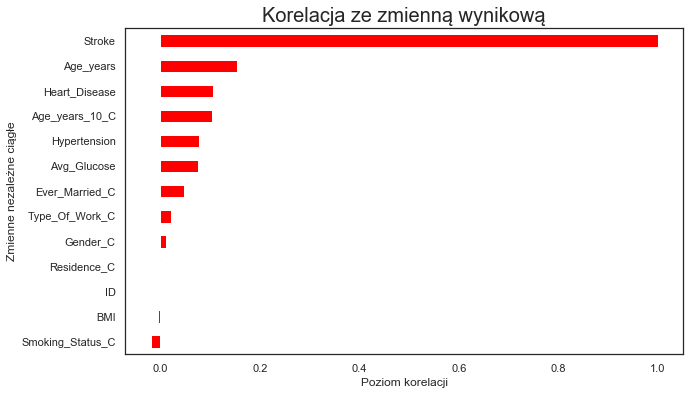

In [17]:
CORREL = df.corr().sort_values('Stroke')
CORREL['Stroke'].to_frame().sort_values('Stroke')

plt.figure(figsize=(10,6))
CORREL['Stroke'].plot(kind='barh', color='red')
plt.title('Korelacja ze zmienną wynikową', fontsize=20)
plt.xlabel('Poziom korelacji')
plt.ylabel('Zmienne nezależne ciągłe')

<div class="alert-success"> Wnioski: Zmienne niezależne słabo się korelują ze zmienną wynikową. Nie występuje też istotna korelacja między zmiennymi zależnymi. Gdyby występowała wysoka korelacja pomiędzy zmiennymi powstała by groźba zjawiska: multicollinearity.
W takiej sytuacji należałoby skorzystać z VIF (variance inflation factor) w celu eliminacji części zmiennych niezależnych.</div>

Zapisuje przygotowane dane 

In [18]:
df.to_csv('c:/1/Stroke_Prediction_NUM.csv')

The end of Part_2: Stroke_Prediction - Preparation of data for the classification process